In [1]:
import cv2
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import font_manager

'''
資料狀況（題目給定）：
label = 實際上數值
pixel = 0~783，可以變成一個28*28的矩陣（二維）
pixel 內容 = 0~255 灰階亮度
公式：因為要轉換成28*28矩陣，可是因為csv通常都是一維的，所以透過轉換公式x = i * 28 + j,可以知道哪一個pixle在哪一個位置。
'''
# 確保資料進入正確
def load_mnist_sample(csv_path, sample_index=0):
    # 讀取 CSV
    df = pd.read_csv(csv_path)
    
    # 取得標籤和像素資料
    label = df.iloc[sample_index, 0]
    pixels = df.iloc[sample_index, 1:].values
    
    # 轉換為 28x28 影像
    image = pixels.reshape(28, 28).astype(np.uint8)
    
    return image, label

CSV_PATH = '/Users/mangtinglee/Desktop/UT/影像辨識/digit-recognizer/train.csv'  # 或 'mnist_test.csv'
 

image, label = load_mnist_sample(CSV_PATH, sample_index=0)
print(f"✓ 成功載入數字: {label}")
print(f"✓ 影像尺寸: {image.shape}")
print(f"✓ 像素值範圍: {image.min()} ~ {image.max()}")
    

✓ 成功載入數字: 1
✓ 影像尺寸: (28, 28)
✓ 像素值範圍: 0 ~ 255


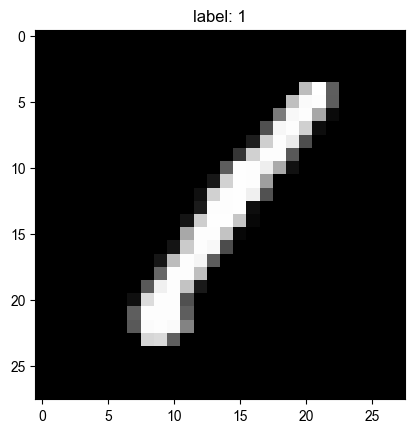

In [7]:
# 印出原始圖片
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')
plt.title(f'label: {label}')
plt.savefig('Original_output.png')  # 存成檔案

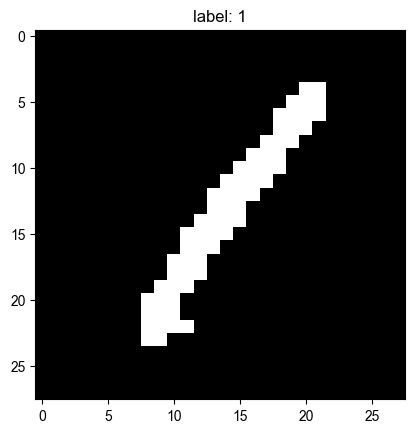

In [8]:
# 印出 Threshold
import matplotlib.pyplot as plt

# 3. 二值化 (Otsu's method)
_, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# THRESH_BINARY = 如果大於 127 就等於 255，反之等於 0。
# THRESH_OTSU = 自動計算臨界值
'''
(計算出來的分類閾值, binary_results) = cv2.threshold(圖像, min, max, methods)

'''
plt.imshow(binary, cmap='gray')
plt.title(f'label: {label}')
plt.savefig('Threshold.png')  # 存成檔案

In [ ]:
import cv2
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 設定中文字型（根據系統選擇）
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

def load_mnist_sample(csv_path, sample_index=0):

    # 讀取 CSV
    df = pd.read_csv(csv_path)
    
    # 取得標籤和像素資料
    label = df.iloc[sample_index, 0]
    pixels = df.iloc[sample_index, 1:].values
    
    # 轉換為 28x28 影像
    image = pixels.reshape(28, 28).astype(np.uint8)
    
    return image, label

def preprocess_image(image):
    """
    對影像進行多種前處理
    
    Parameters:
    -----------
    image : numpy array
        輸入的灰階影像
    
    Returns:
    --------
    results : dict
        包含各種處理結果的字典
    """
    results = {}
    
    # 1. 原始影像
    results['original'] = image
    
    # 2. 灰階化（MNIST 本身就是灰階，這裡只是示範）
    results['grayscale'] = image.copy()
    
    # 3. 二值化 (Otsu's method)
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    results['binary'] = binary
    
    # 4. 自適應二值化
    adaptive_binary = cv2.adaptiveThreshold(
        image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 11, 2
    )
    results['adaptive_binary'] = adaptive_binary
    
    # 5. 邊緣偵測 (Canny)
    edges = cv2.Canny(image, 50, 150)
    results['canny_edge'] = edges
    
    # 6. 形態學處理 - 膨脹
    kernel = np.ones((3,3), np.uint8)
    dilated = cv2.dilate(image, kernel, iterations=1)
    results['dilated'] = dilated
    
    # 7. 形態學處理 - 侵蝕
    eroded = cv2.erode(image, kernel, iterations=1)
    results['eroded'] = eroded
    
    # 8. 高斯模糊
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    results['gaussian_blur'] = blurred
    
    return results

def visualize_preprocessing(results, label):
    """
    視覺化所有前處理結果
    
    Parameters:
    -----------
    results : dict
        前處理結果字典
    label : int
        數字標籤
    """
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle(f'MNIST 數字 {label} 的前處理結果', fontsize=16, fontweight='bold')
    
    processing_steps = [
        ('original', '原始影像'),
        ('grayscale', '灰階影像'),
        ('binary', '二值化 (Otsu)'),
        ('adaptive_binary', '自適應二值化'),
        ('canny_edge', '邊緣偵測 (Canny)'),
        ('dilated', '膨脹處理'),
        ('eroded', '侵蝕處理'),
        ('gaussian_blur', '高斯模糊')
    ]
    
    for idx, (key, title) in enumerate(processing_steps):
        row = idx // 3
        col = idx % 3
        
        axes[row, col].imshow(results[key], cmap='gray')
        axes[row, col].set_title(title, fontsize=12, fontweight='bold')
        axes[row, col].axis('off')
    
    # 隱藏最後一個空白子圖
    axes[2, 2].axis('off')
    
    plt.tight_layout()
    plt.show()

def compare_samples(csv_path, num_samples=5):
    """
    比較多個樣本的前處理效果
    
    Parameters:
    -----------
    csv_path : str
        CSV 檔案路徑
    num_samples : int
        要比較的樣本數量
    """
    fig, axes = plt.subplots(num_samples, 4, figsize=(16, 4*num_samples))
    fig.suptitle('多樣本前處理比較', fontsize=16, fontweight='bold')
    
    titles = ['原始影像', '二值化', '邊緣偵測', '高斯模糊']
    
    for i in range(num_samples):
        # 載入樣本
        image, label = load_mnist_sample(csv_path, sample_index=i)
        results = preprocess_image(image)
        
        # 顯示不同處理結果
        images_to_show = [
            results['original'],
            results['binary'],
            results['canny_edge'],
            results['gaussian_blur']
        ]
        
        for j, (img, title) in enumerate(zip(images_to_show, titles)):
            if num_samples == 1:
                ax = axes[j]
            else:
                ax = axes[i, j]
            
            ax.imshow(img, cmap='gray')
            if i == 0:
                ax.set_title(title, fontsize=12, fontweight='bold')
            ax.set_ylabel(f'數字 {label}', fontsize=10)
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# ============= 主程式範例 =============
if __name__ == "__main__":
    # 請替換成你的 CSV 檔案路徑
    CSV_PATH = 'mnist_train.csv'  # 或 'mnist_test.csv'
    
    print("=" * 50)
    print("MNIST 影像前處理測試")
    print("=" * 50)
    
    # 測試 1: 單一樣本的完整前處理
    print("\n[測試 1] 載入並前處理單一樣本...")
    image, label = load_mnist_sample(CSV_PATH, sample_index=0)
    print(f"✓ 成功載入數字: {label}")
    print(f"✓ 影像尺寸: {image.shape}")
    print(f"✓ 像素值範圍: {image.min()} ~ {image.max()}")
    
    # 執行前處理
    results = preprocess_image(image)
    print(f"✓ 完成 {len(results)} 種前處理方法")
    
    # 視覺化結果
    print("\n正在繪製前處理結果...")
    visualize_preprocessing(results, label)
    
    # 測試 2: 多樣本比較
    print("\n[測試 2] 多樣本前處理比較...")
    compare_samples(CSV_PATH, num_samples=5)
    
    print("\n" + "=" * 50)
    print("前處理測試完成！")
    print("=" * 50)